<a href="https://colab.research.google.com/github/priscillasp/Healthcare_Reviews_DA/blob/main/Healthcare_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler


In [6]:
df = pd.read_csv('/Demo Patient Experience Data_NHC.csv')

In [7]:
df.head()

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b..."
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv..."


In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.shape

(20000, 8)

In [10]:
df.describe()

,Entry Code,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,50.522750,3.012000,2.995500,92.620550
std,5773.647028,28.841737,1.411792,1.421366,50.730445
min,1.000000,1.000000,1.000000,1.000000,5.000000
25%,5000.750000,26.000000,2.000000,2.000000,48.000000
50%,10000.500000,51.000000,3.000000,3.000000,93.000000
75%,15000.250000,75.000000,4.000000,4.000000,136.000000
max,20000.000000,100.000000,5.000000,5.000000,180.000000


In [11]:
df.isnull().sum()

,0
Entry Code,0
Feedback Date,0
Patient Age,0
Staff Rating,0
Speed Rating,0
Wait Time (minutes),0
Test Type,0
Review,0


In [12]:
average_total_time_in_hours = df['Wait Time (minutes)'].mean()
average_total_time_in_hours

92.62055

Demography Analysis (Age)

In [13]:
df["Patient Age"].min()

1

In [14]:
df["Patient Age"].max()

100

In [15]:
age_bins = [1,10,20,30,40,50,60,70,80,90,100]
df['Age_Range'] = pd.cut(df['Patient Age'],bins=age_bins)

Text(0.5, 1.0, 'Age Distribution')

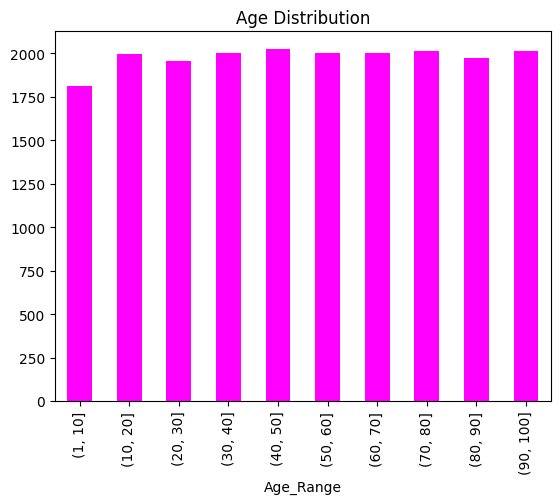

In [16]:
#Plot the age distribution by Age bins
age_distribution = df['Age_Range'].value_counts().sort_index()
age_distribution.plot(kind='bar',color='fuchsia')
plt.title('Age Distribution')

Rating Data Visualizations

Text(0.5, 1.0, 'Staff Rating')

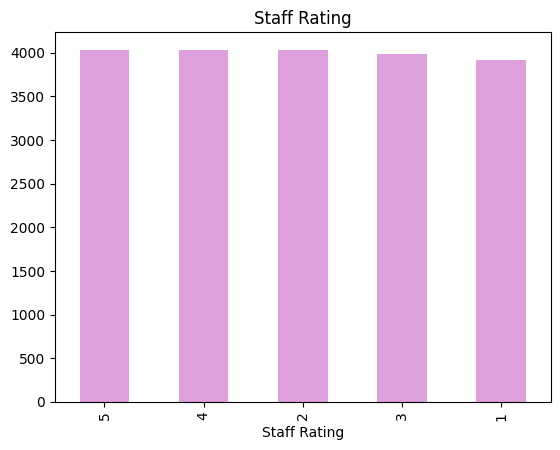

In [17]:
df["Staff Rating"].value_counts().plot(kind='bar',color='Plum')
plt.title('Staff Rating')

Text(0.5, 1.0, 'Speed Rating')

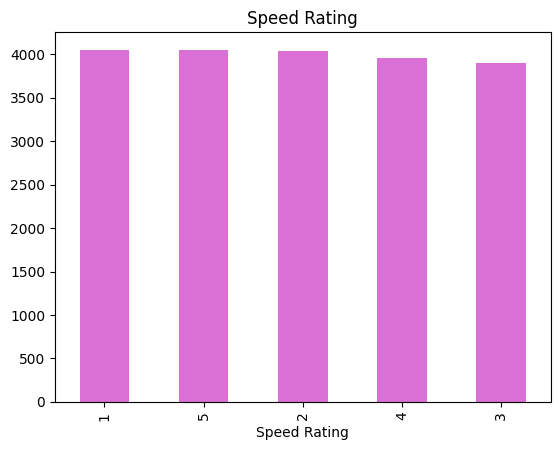

In [18]:
df["Speed Rating"].value_counts().plot(kind='bar',color='Orchid')
plt.title('Speed Rating')

Sentiment and Polarity Analysis

In [19]:
#Convert the Review column into a textblob object and add Polarity column
df['Polarity'] = df['Review'].apply(lambda x : TextBlob(x).polarity)

#Add subjectivity column
df['Subjectivity'] = df['Review'].apply(lambda x : TextBlob(x).subjectivity)

#Add sentiment column
df['Sentiment'] = df['Polarity'].apply(lambda x : 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

df.head()

,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Age_Range,Polarity,Subjectivity,Sentiment
0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,"(60, 70]",0.580000,0.765000,Positive
1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,"(20, 30]",0.262121,0.650000,Positive
2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,"(50, 60]",0.031506,0.548752,Positive
3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...","(30, 40]",0.171875,0.446875,Positive
4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...","(90, 100]",-0.421429,0.650000,Negative


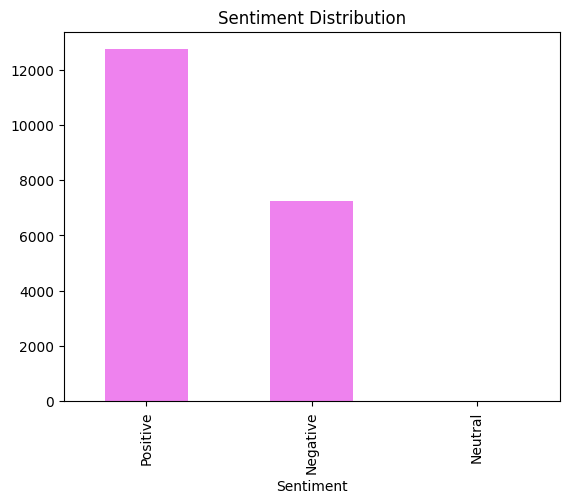

In [20]:

#Plot the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar',color='Violet')
plt.title('Sentiment Distribution')
plt.show() # added plt.show() to display the plot


Is Wait time correlated with with Sentiment?


In [21]:
#Create df with only target columns
df_sentiment_wait = df[['Wait Time (minutes)','Sentiment']]

# Convert sentiment to numeric values
df_sentiment_wait['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

#Standardize wait time to values between 1 and -1
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
df_sentiment_wait['Wait Time (minutes)'] = scaler.fit_transform(df_sentiment_wait[['Wait Time (minutes)']])

df_sentiment_wait.head()

<ipython-input-21-1503fec44c21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_wait['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
<ipython-input-21-1503fec44c21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_wait['Wait Time (minutes)'] = scaler.fit_transform(df_sentiment_wait[['Wait Time (minutes)']])


,Wait Time (minutes),Sentiment
0,-0.725714,1
1,0.897143,1
2,0.954286,1
3,0.017143,1
4,0.828571,-1


In [22]:
#Run correlation
correlation = df_sentiment_wait.corr()
correlation

,Wait Time (minutes),Sentiment
Wait Time (minutes),1.000000,0.003751
Sentiment,0.003751,1.000000


The correlation value of 0.003 indicates that sentiment is not correlated with wait time. Even when wait time is standarized between -1 and 1 to match sentiment values.

Is Polarity related to Wait time?

In [23]:
df["Polarity"].describe()

,Polarity
count,20000.000000
mean,0.079667
std,0.315782
min,-1.000000
25%,-0.128125
50%,0.095000
75%,0.275000
max,0.810417


In [24]:
#Create df with only target columns
df_polarity_wait = df[['Wait Time (minutes)','Polarity']]

#Standardize wait time to values between 1 and -1
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
df_polarity_wait['Wait Time (minutes)'] = scaler.fit_transform(df_sentiment_wait[['Wait Time (minutes)']])

df_polarity_wait.head()

<ipython-input-24-5f707454c8ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polarity_wait['Wait Time (minutes)'] = scaler.fit_transform(df_sentiment_wait[['Wait Time (minutes)']])


,Wait Time (minutes),Polarity
0,-0.725714,0.580000
1,0.897143,0.262121
2,0.954286,0.031506
3,0.017143,0.171875
4,0.828571,-0.421429


In [25]:
df_polarity_wait.corr()

,Wait Time (minutes),Polarity
Wait Time (minutes),1.000000,0.003348
Polarity,0.003348,1.000000


Text(0, 0.5, 'Wait Time (minutes)')

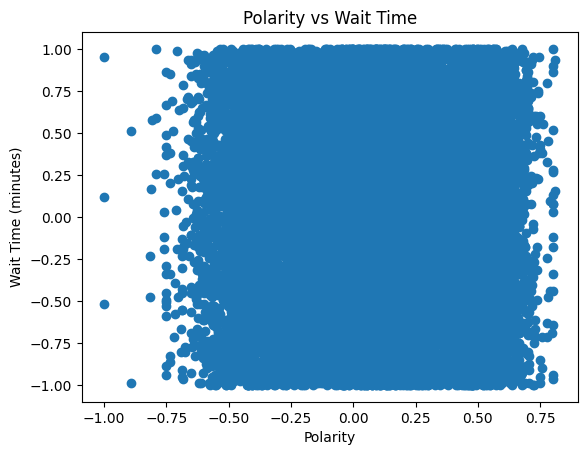

In [26]:
#Polarity and Wait Time Scatter Plot
plt.scatter(df_polarity_wait['Polarity'],df_polarity_wait['Wait Time (minutes)'])
plt.title('Polarity vs Wait Time')
plt.xlabel('Polarity')
plt.ylabel('Wait Time (minutes)')

**Pharmaceutical Drug Dataset**

In [28]:
df_drugs = pd.read_csv("/drugsComTrain_raw.csv.zip")
df_drugs.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [29]:
df_drugs.drop(columns=["Unnamed: 0","date","usefulCount"],inplace=True)
df_drugs.head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0


In [30]:
type(df_drugs["drugName"])

pandas.core.series.Series

In [31]:
#convert drugName to string
df_drugs["drugName"] = df_drugs["drugName"].astype(str)

In [32]:
Drugs_frequency = df_drugs["drugName"].value_counts()
Drugs_frequency

,count
drugName,
Levonorgestrel,3657
Etonogestrel,3336
Ethinyl estradiol / norethindrone,2850
Nexplanon,2156
Ethinyl estradiol / norgestimate,2117
...,...
Omnipaque 350,1
Vontrol,1
Ivabradine,1


In [33]:
#Visualize the top 50 most common drugs
top_number = 50
top_classes = df_drugs['drugName'].value_counts().nlargest(top_number).index
df_top_med_classes = df_drugs[df_drugs['drugName'].isin(top_classes)]
df_top_med_classes

,drugName,condition,review,rating
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0
10,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9.0
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0
15,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9.0
...,...,...,...,...
161270,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9.0
161271,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10.0
161273,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6.0
161284,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9.0


Text(0.5, 1.0, 'Top 50 Most Common Drugs')

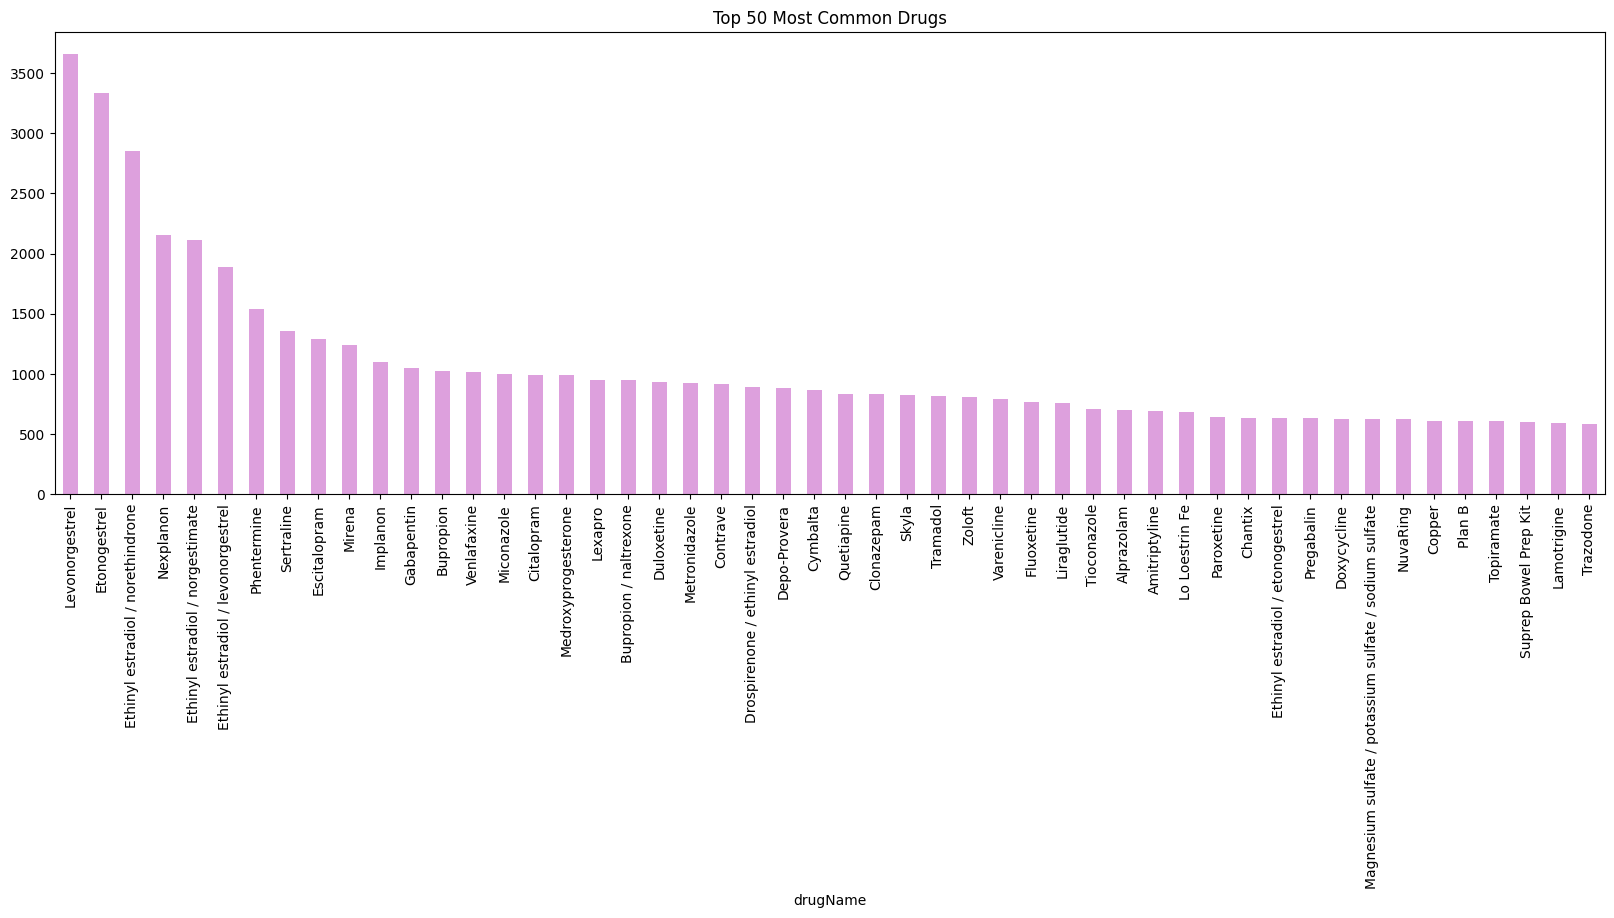

In [34]:
df_top_med_classes["drugName"].value_counts().plot(kind='bar',color='plum', figsize= (20,6))
plt.title('Top 50 Most Common Drugs')


<Axes: xlabel='condition'>

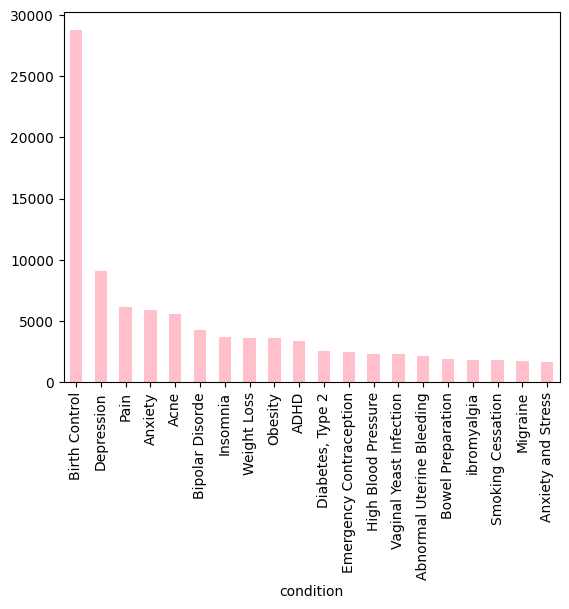

In [35]:
#20 Most common conditions
df_drugs["condition"].value_counts().nlargest(20).plot(kind = "bar", color = "pink")

<Axes: xlabel='drugName'>

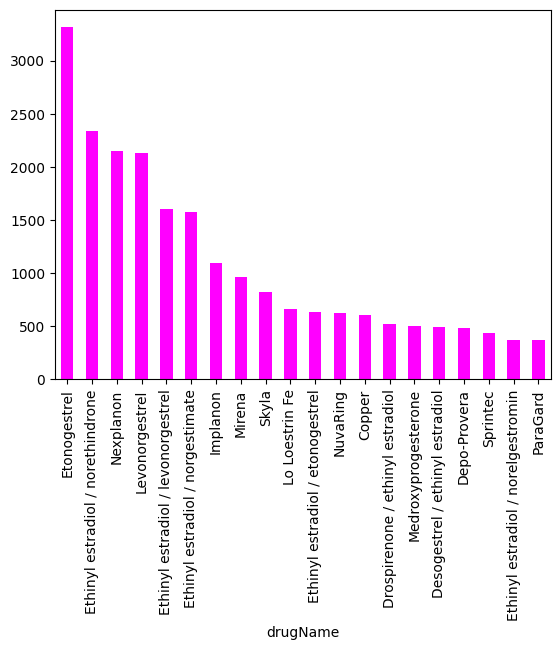

In [36]:
#What is the most common drug given for birth control?
df_drugs[df_drugs["condition"] == "Birth Control"]["drugName"].value_counts().nlargest(20).plot(kind = "bar", color = "Magenta")

<Axes: xlabel='drugName'>

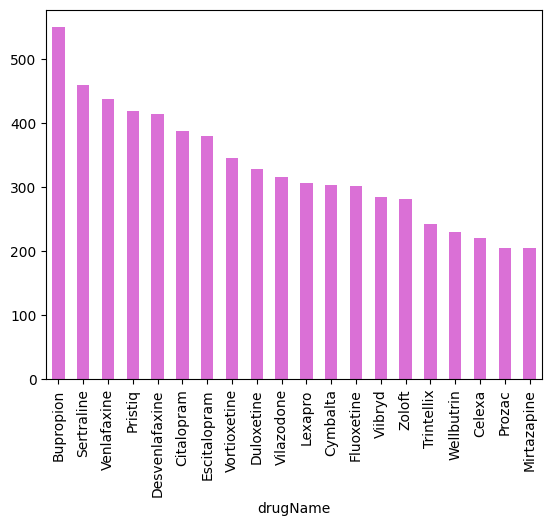

In [37]:
#What is the most common drug given for Depression?
df_drugs[df_drugs["condition"] == "Depression"]["drugName"].value_counts().nlargest(20).plot(kind = "bar", color = "Orchid")


**SENTIMENT ANALYSIS**

In [38]:
#Add row for sentiment, polarity and subjectivity
#Convert the Review column into a textblob object and add Polarity column
df_drugs['Polarity'] = df_drugs['review'].apply(lambda x : TextBlob(x).polarity)

#Add subjectivity column
df_drugs['Subjectivity'] = df_drugs['review'].apply(lambda x : TextBlob(x).subjectivity)

#Add sentiment column
df_drugs['Sentiment'] = df_drugs['Polarity'].apply(lambda x : 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

df_drugs.head()

,drugName,condition,review,rating,Polarity,Subjectivity,Sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,0.000000,0.000000,Neutral
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,0.168333,0.431349,Positive
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,0.067210,0.402155,Positive
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,0.179545,0.665909,Positive
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,0.194444,0.401389,Positive


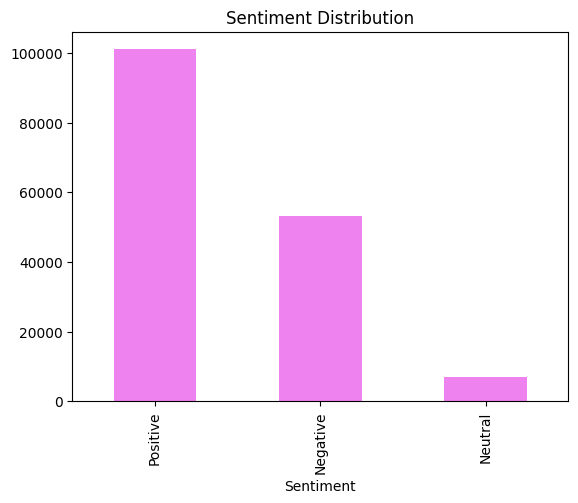

In [39]:

#Plot the sentiment distribution
sentiment_distribution = df_drugs['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar',color='Violet')
plt.title('Sentiment Distribution')
plt.show() # added plt.show() to display the plot

In [40]:
#Is polarity correlated with rating?
df_drugs["Polarity"].corr(df_drugs["rating"])

0.3485379128708555

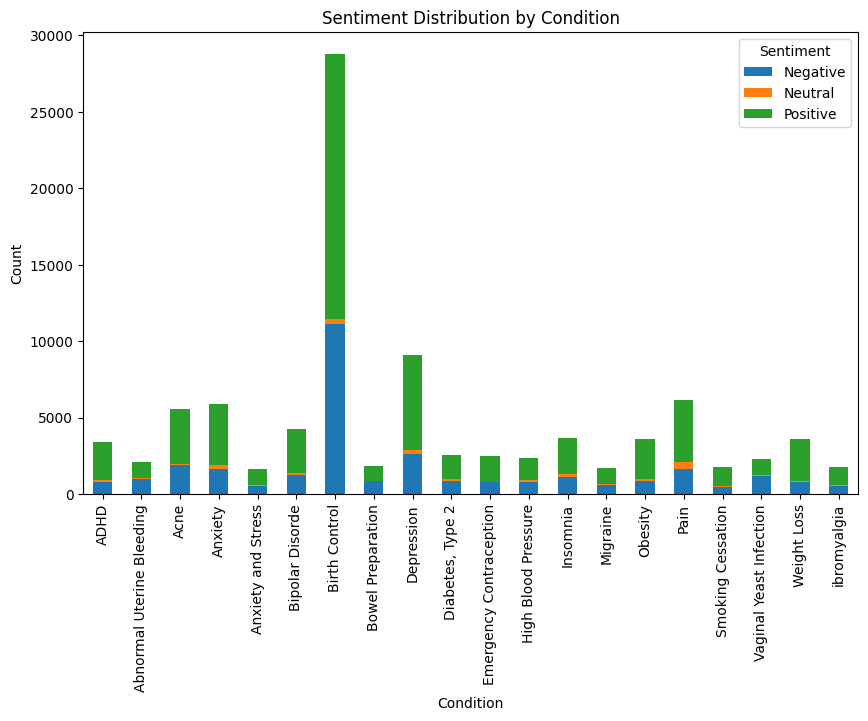

In [46]:
#Visualize Sentiment based on condition
# Get the top 20 most common conditions
top_conditions = df_drugs['condition'].value_counts().nlargest(20).index

# Filter the DataFrame for only the top 20 conditions
filtered_df = df_drugs[df_drugs['condition'].isin(top_conditions)]

## Get the counts of each sentiment per condition
condition_sentiment_counts = filtered_df.groupby(['condition', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
condition_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()